<a href="https://colab.research.google.com/github/Liyang-Tai/NKUST_Machine-Learning/blob/main/Lab1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.head(6)

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [ ]:
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
59,0,1,0
66,0,1,0
99,0,1,0
4,1,0,0
76,0,1,0
5,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


In [ ]:
from sklearn.neural_network import MLPClassifier

Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01,
                     solver='sgd', verbose=1,  random_state=121)

h=Model.fit(x_train,y_train)

y_pred=Model.predict(x_test)

Iteration 1, loss = 2.54427386
Iteration 2, loss = 2.50239028
Iteration 3, loss = 2.44860033
Iteration 4, loss = 2.38850821
Iteration 5, loss = 2.32700261
Iteration 6, loss = 2.26664761
Iteration 7, loss = 2.20856868
Iteration 8, loss = 2.15371623
Iteration 9, loss = 2.10354705
Iteration 10, loss = 2.05920874
Iteration 11, loss = 2.02091627
Iteration 12, loss = 1.98831608
Iteration 13, loss = 1.96105454
Iteration 14, loss = 1.93923713
Iteration 15, loss = 1.92275078
Iteration 16, loss = 1.91058820
Iteration 17, loss = 1.90238792
Iteration 18, loss = 1.89682814
Iteration 19, loss = 1.89322628
Iteration 20, loss = 1.89070678
Iteration 21, loss = 1.88853081
Iteration 22, loss = 1.88613704
Iteration 23, loss = 1.88346604
Iteration 24, loss = 1.88041614
Iteration 25, loss = 1.87695710
Iteration 26, loss = 1.87308791
Iteration 27, loss = 1.86897115
Iteration 28, loss = 1.86460843
Iteration 29, loss = 1.86002408
Iteration 30, loss = 1.85530941
Iteration 31, loss = 1.85054976
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      1.00      0.97        15
           2       0.87      1.00      0.93        13

   micro avg       0.94      1.00      0.97        45
   macro avg       0.93      1.00      0.97        45
weighted avg       0.94      1.00      0.97        45
 samples avg       0.97      1.00      0.98        45

[[17  0  0]
 [ 0 15  0]
 [ 0  1 12]]
accuracy is  0.9333333333333333


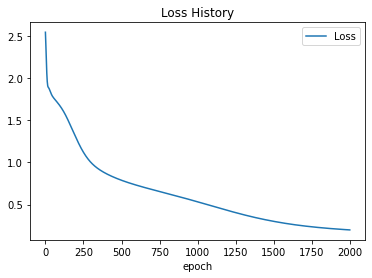

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])